# Big Data Management and Analysis in Physics Research
# Claudio Fadda (813499)

## Predizione di malattie cardiache

Prevedere se un paziente ha probabilità una malattia cardiaca o meno. Abbiamo un dato che classifica se i pazienti hanno o meno malattie cardiache in base alle caratteristiche in esso contenute. Cercheremo di utilizzare questi dati per creare un modello che tenti di prevedere se un paziente ha questa malattia o meno.

Il set di dati è memorizzato nel file `heart.csv` e preso da
https://archive.ics.uci.edu/ml/datasets/Heart+Malattia

In [1]:
import pandas as pd
data = pd.read_csv('data/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Il significato delle feature è descritto di seguito, per quanto riguarda la colonna "target" si noti che con lo 0 si identifica la presenza di una malattia cardiaca (1 il contrario).

 - age: età

 - sex: sesso (1 = male, 0 = female)

- cp: dolore al torace
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic

- trestbps: pressione sanguigna a riposo in mm Hg (al momento del ricovero)

- chol: colesterolo (mg/dl)

- fbs: glicemia a riposo (> 120 mg/dl, 1 = true; 0 = false)

- restecg: elettrocardiogramma
    - 0 = normal 
    - 1 = having ST-T wave abnormality 
    - 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach: Frequenza cardiaca massima raggiunta
- exang: Angina (dolore al petto) indotto dall'esercizio
    - 1 = yes
    - 0 = no
- oldpeak: Sottoslivellamento ST indotto dall'esercizio rispetto al riposo (riferito alle posizioni sul tracciato dell'ECG)
- slope: la pendenza del segmento di picco dell'esericizio
- ca: Numero di maggiori vasi sangugni (0–3)
- thal: talassemia Value
    - Value 1: fixed defect (no blood flow in some part of the heart)
    - Value 2: normal blood flow
    - Value 3: reversible defect (a blood flow is observed but it is not normal)

- target: patologia cardiaca
    - 0 = yes
    - 1 = no

### Verifica del dataset

La documentazione con il significato delle feature è disponibile sul sito https://archive.ics.uci.edu/ml/datasets/Heart+disease

La documentazione parla di:
num (target): diagnosis of heart disease (angiographic disease status)
- Value 0: < 50% diameter narrowing
- Value 1: > 50% diameter narrowing

Ossia presenza della malattia se il valore è 1 (maggiore restringimento dell'arteria, assenza di malattia se il valore è 0 (minore restringimento dell'arteria e quindi diametro normale).

Facciamo ora un plot dell'età media per il quale si presenta una malattia cardiaca:

[Text(0.5, 1.0, 'Distribuzione Età vs Nessuna presenza della malattia')]

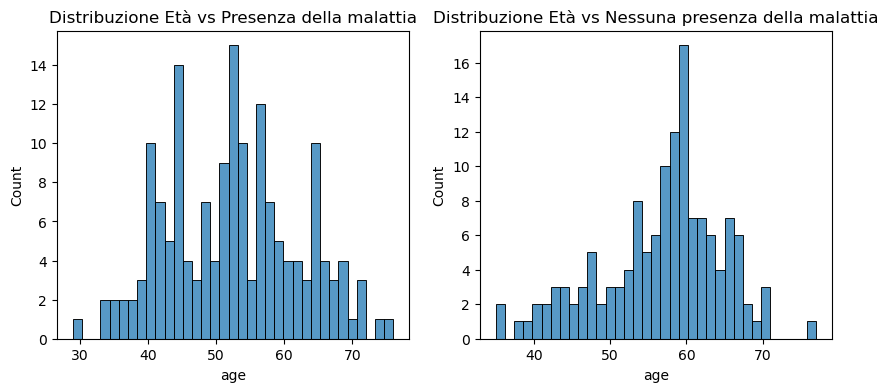

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
sns.histplot(data[data['target'] == 1]['age'], bins=35, ax=ax1).set(title='Distribuzione Età vs Presenza della malattia')
sns.histplot(data[data['target'] == 0]['age'], bins=35, ax=ax2).set(title='Distribuzione Età vs Nessuna presenza della malattia')

Particolare come nel grafico a destra si abbia un picco di soggetti senza nessuna malattia nell'intorno dei 60 anni di età.

L'immagine sottostante prende in riferimento i dati scaricabili sul sito UCI, e si fa un confronto con gli stessi dati presenti in questo dataset. Sono stati presi otto soggetti scelti casualmente sul dataset originale e poi sono state cercate le stesse righe sul nostro a disposizione.

<img src="tabella.png">

In [3]:
data.iloc[[0, 2, 16, 252, 270, 131, 285, 138]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1


Ci accorgiamo che la colonna target è opposta a quella del nostro dataset, in particolare:
- Lo 0 nel dataset originale corrisponde ad un 1 nel nostro dataset (e viceversa)
- Nel dataset originale sono presenti anche valori diversi di target, in particolare:
    - Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0); valori quindi maggiori di 1 dovrebbero corrispondere a 1 (nel nostro dataset corrispondono a 0).
- Le colonne "cp", "restecg", "slope", "thal" non corrispondono completamente ai nostri valori, anche in questo caso sigle diverse potrebbero corrispondere a classi diverse del dato.

Per quanto riguarda lo studio di questo dataset andremmo a mappare la colonna target, inserendo un 1 in presenza dello 0 e quindi il contrario, lasceremo invece le altre colonne inalterate.

In [4]:
data["target"].replace({0: 1, 1: 0}, inplace= True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Valori nulli

In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data[data.eq(-9).any(1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Nel dataset non sono presenti valori nulli, viene effettuata anche una ricerca del valore "-9" in quanto sulla documentazione viene riportato che un valore nullo assumerebbe questa dicitura.

### Analisi descrittive

In [8]:
print("Uomini: " + str(data.sex.sum()))
print("Donne: " + str(data.sex.count() - data.sex.sum()))

Uomini: 207
Donne: 96


[Text(0, 0.5, 'Età'), Text(0.5, 0, 'Sesso')]

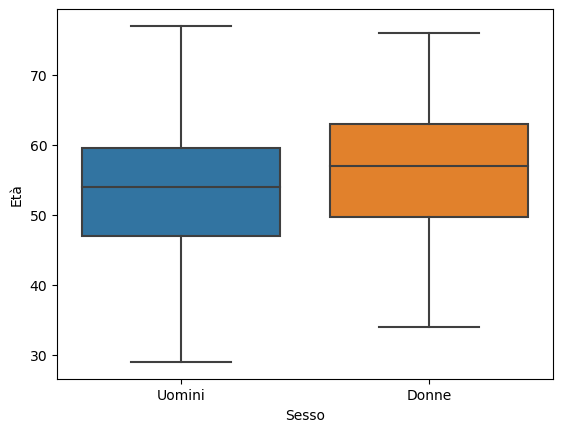

In [9]:
import seaborn as sns

dfMale = data[data["sex"]==1]
dfMale = dfMale.rename(columns={"age":"Uomini"})
dfFemale = data[data["sex"]==0]
dfFemale = dfFemale.rename(columns={"age":"Donne"})
df = pd.concat([dfMale['Uomini'].reset_index(drop=True), dfFemale['Donne'].reset_index(drop=True)], axis=1)

sns.boxplot(x='variable', y='value', data=pd.melt(df)).set(
            xlabel='Sesso', 
            ylabel='Età')

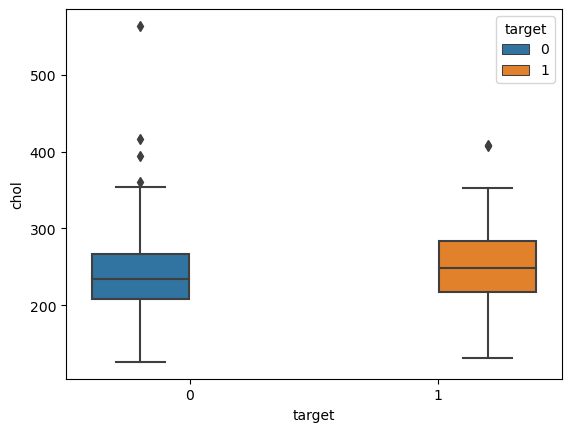

In [10]:
sns.boxplot(data=data, x="target", y="chol", hue="target")

In [12]:
from scipy import stats
c = data[data.target == 0]
v = data[data.target == 1]

stats.ttest_ind(c.chol, v.chol)

Ttest_indResult(statistic=-1.4842450762526977, pvalue=0.1387903269560064)

Il pValue in questo caso è maggiore di 0.05 quindi accettiamo l'ipotesi nulla; possiamo affermare che non c'è una differenza dei livelli di colestorolo medio tra malati e non malati.

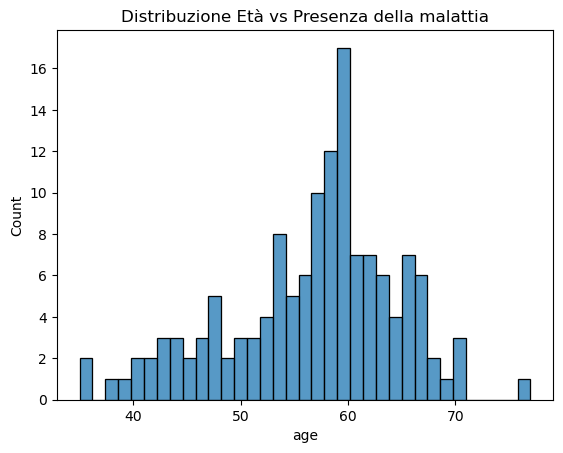

In [13]:
sns.histplot(data[data['target'] == 1]['age'], bins=35).set(title='Distribuzione Età vs Presenza della malattia')
plt.show()

La distribuzione ci permette di vedere come le persone con malattie cardiache accertate abbiano all'incirca tra i 55 e 63 anni.

### Dataset bilanciato
Assumiamo che la variabile target sia abbastanza bilanciata.

In [15]:
print("Malattia cardiaca: " + str(data.target.sum()))
print("Nessuna malattia cardiaca: " + str(data.target.count() - data.target.sum()))

Malattia cardiaca: 138
Nessuna malattia cardiaca: 165


### Dummy
Dummizziamo le variabili che hanno più di una classe:

In [94]:
data = pd.get_dummies(data, columns=['cp', 'restecg', 'ca', 'thal'])
data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,target,...,restecg_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,...,0,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,...,0,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,1,...,0,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,1,1,...,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,1,1,...,0,0,0,1,0,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,1,...,0,0,1,0,0,0,0,0,0,1


In [162]:
X = data.copy()
y = data["target"]
X = X.drop(columns="target")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

### Decision Tree

In [163]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

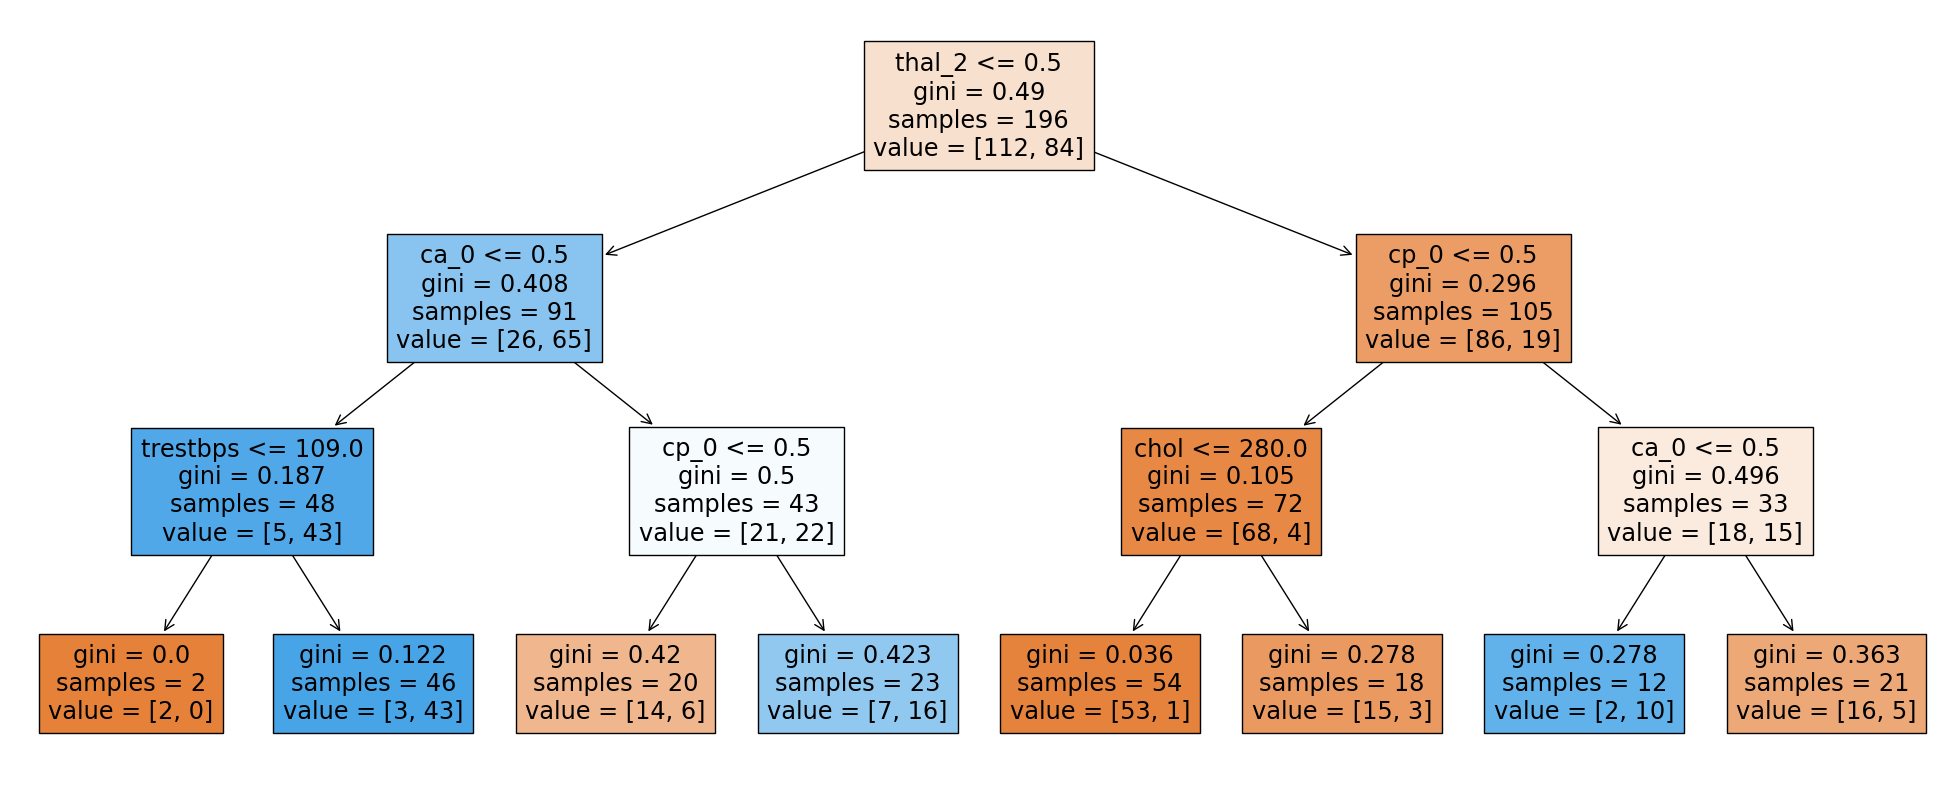

In [164]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,
                   filled=True)

Vediamo che la prima feature che viene presa in considerazion è thal_2 (una particolare condizione di talassemia), se questa non è presente allora si passa a sinistra e viene presa in considerazione ca_0 (numero di vasi sanguigni), se invece si va  a destra viene ancora cp_0 (dolore al torace).

In [165]:
feat_dict= {}
for col, val in sorted(zip(X_train.columns, clf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importanza':feat_dict.values()})
feat_df

,Feature,Importanza
0,thal_2,0.510397
1,ca_0,0.222821
2,cp_0,0.194230
3,trestbps,0.061646
4,chol,0.010906
5,age,0.000000
6,sex,0.000000
7,fbs,0.000000
8,thalach,0.000000
9,exang,0.000000


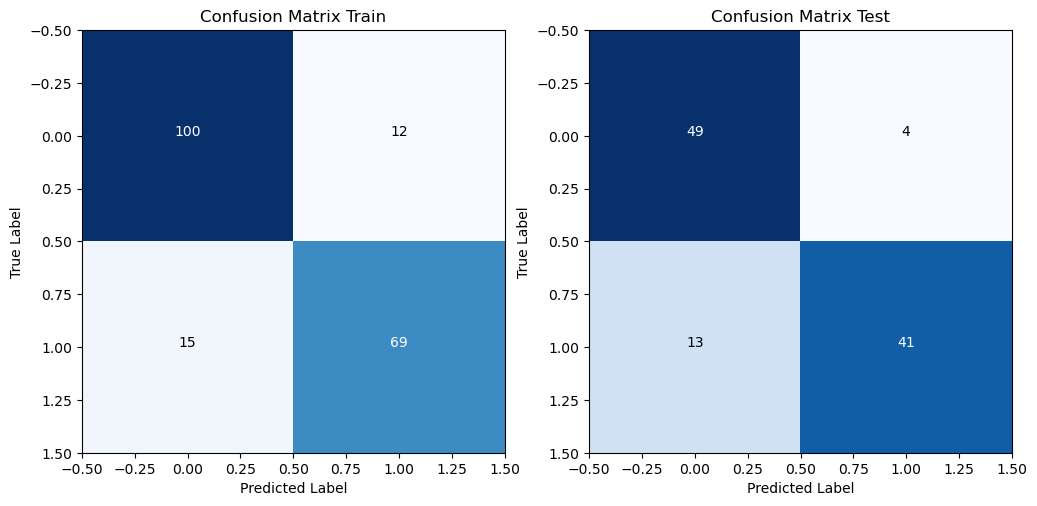

In [167]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(y_train, y_train_hat)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(y_test, y_test_hat)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

In [207]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_test_hat))
print("Precision:",metrics.precision_score(y_test, y_test_hat))
print("Recall:",metrics.recall_score(y_test, y_test_hat))

Accuracy: 0.8411214953271028
Precision: 0.9111111111111111
Recall: 0.7592592592592593


Le matrici di confusione sia per il train che per il test sono delle buone tabelle in quanto vediamo che sia in train che in test vengono classificati correttamente diversi soggetti. Importante anche notare che non sembra esserci overfitting o underfitting.
Accuracy e Precision raggiungono dei buoni valori, meno la recall che poteva essere migliore in quanto abbiamo diversi falsi negativi (in questo contesto 13 pazienti che sono malati sono stati classificati come sani).

Train AUC 0.920
Test AUC 0.832


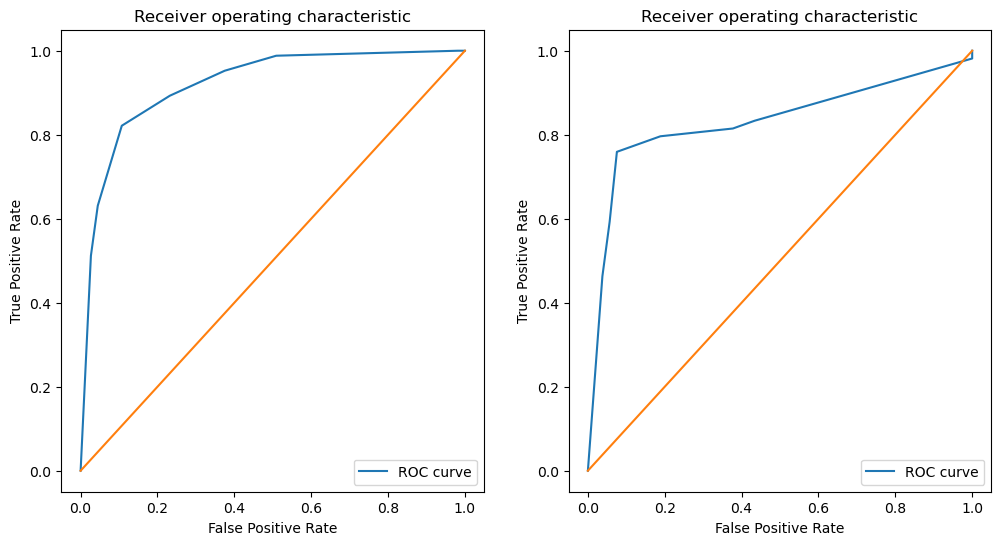

In [208]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

y_test_proba = clf.predict_proba(X_test)
y_train_proba = clf.predict_proba(X_train)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve(y_train, y_train_proba[:,1])
roc_auc = auc(fpr, tpr)
print(f'Train AUC {roc_auc:.3f}')

ax1.plot(fpr, tpr, label="ROC curve")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("Receiver operating characteristic")
ax1.legend(loc="lower right")
    
fpr, tpr, _ = roc_curve(y_test, y_test_proba[:,1])
roc_auc = auc(fpr, tpr)
print(f'Test AUC {roc_auc:.3f}')

ax2.plot(fpr, tpr, label="ROC curve")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("Receiver operating characteristic")
ax2.legend(loc="lower right")

plt.show()

Anche le ROC curve danno una impressione che il decision tree abbia classificato abbastanza bene i dati a disposizione, anche in questo caso vediamo che sul train la curva blu non forma un angolo retto e quindi possiamo essere sicuri di non essere andati in overfitting; allo stesso modo sul test la curva è abbastanza lontana dalla retta a 45° e questo ci permette di affermare che la classificazione sul test set sia andata a buon fine.
Possiamo ritenerci soddisfatti di entrambi i valori di AUC.

### Machine learning - Reti neurali con Keras

In [209]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU

from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [210]:
X = data
X = X.drop('target', axis=1)
y = data['target']

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

In [214]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Impostiamo "input_dim" pari a 25 per via delle 25 feature che abbiamo in input e inseriamo diversi strati con un numero di nodi variabili e funzione di attivazione ReLU, all'ultimo strato è stato assegnato la funzione di attivazione sigmoidale in modo da avere in output un numero compreso tra 0 e 1.

In [215]:
model = Sequential()

model.add(Dense(12, input_dim=25))
model.add(ReLU())
model.add(Dense(units=8))
model.add(ReLU())
model.add(Dense(units=4))
model.add(ReLU())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 26ms/step - loss: 0.7571 - accuracy: 0.5198 - val_loss: 0.6323 - val_accuracy: 0.6053
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7191 - accuracy: 0.5242 - val_loss: 0.6111 - val_accuracy: 0.6053
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6886 - accuracy: 0.5330 - val_loss: 0.5953 - val_accuracy: 0.6316
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6649 - accuracy: 0.5595 - val_loss: 0.5822 - val_accuracy: 0.6579
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6445 - accuracy: 0.5859 - val_loss: 0.5708 - val_accuracy: 0.6579
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6274 - accuracy: 0.6079 - val_loss: 0.5600 - val_accuracy: 0.7237
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6107 - accuracy: 0.6344 - val_loss: 0.5496 - val_accuracy: 0.7368
Epoch 8/100
8/8 [=========

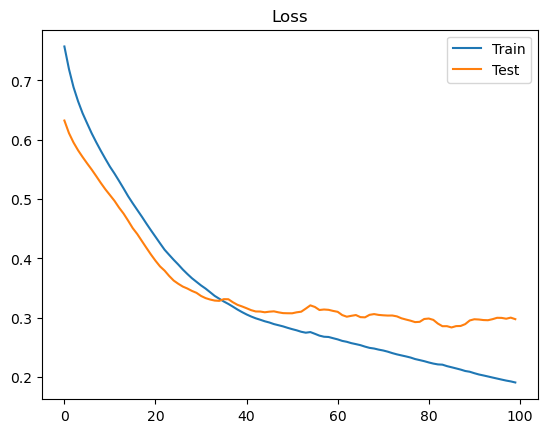

In [216]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()

Vediamo che ad ogni apprendimento la loss function si abbassa per quanto riguarda il Train, mentre per il test dopo circa 60 epoche la Loss rimane stabile.

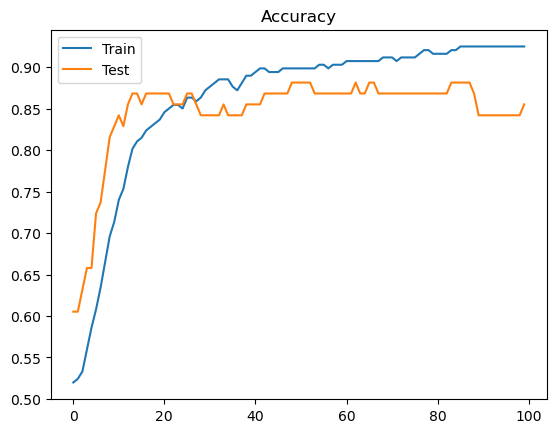

In [217]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['Train', 'Test'])
plt.show()

Per quanto riguarda l'accuracy otteniamo dei buoni risultati, con una crescita abbastanza importante dentro le prime 20 epoche e poi si ha un assestamento per valori intorno allo 0.85.

3/3 [==============================] - 0s 3ms/step


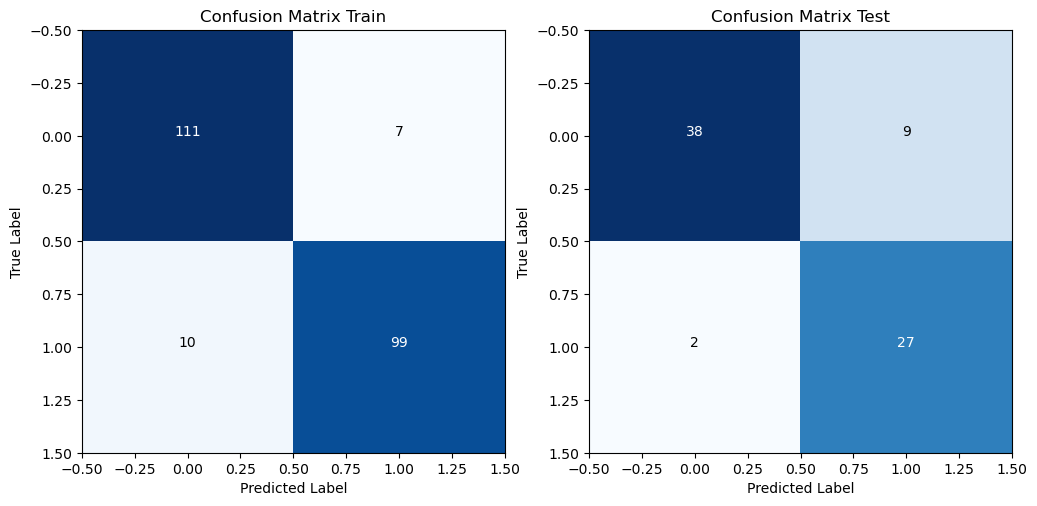

In [218]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools

y_train_hat = np.rint(model.predict(x_train))
y_test_hat = np.rint(model.predict(x_test))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(y_train, y_train_hat)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(y_test, y_test_hat)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

In [219]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_hat))
print("Precision:",metrics.precision_score(y_test, y_test_hat))
print("Recall:",metrics.recall_score(y_test, y_test_hat))

Accuracy: 0.8552631578947368
Precision: 0.75
Recall: 0.9310344827586207


Con questo modello perdiamo in precision rispetto al Decision Tree mentre guadagniamo in recall.